# Importing Libraries and Reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data using pandas
data = pd.read_csv("Earloobe_data_Copy.csv")

df = pd.DataFrame(data)
print(df)

       Sex  Age  Finger  Earlobe    Arm
0     Male   59     100       94  109.8
1     Male   55     293      277  302.4
2     Male   39     104       97  106.2
3     Male   65     122      119  127.8
4     Male   54      94       96  100.8
5   Female   50     118      120  127.8
6     Male   43      84       83   81.0
7     Male   63      84       81   97.2
8     Male   63      79       78   93.6
9     Male   52     100      115  118.8
10  Female   62     105       99   99.0
11  Female   48     143      140  149.4
12  Female   63     120      116  120.6
13    Male   41      94       80   81.0
14  Female   43     114      107  109.8
15  Female   77     176      171  169.2
16    Male   49      90      108  104.4
17    Male   25      99       93   88.2
18  Female   43     149      140  138.6
19  Female   48     245      256  261.0
20  Female   72      92       98  111.6
21    Male   53     145      148  149.4
22  Female   21      89       86   77.4
23  Female   58     146      131  144.0


In [3]:
df.describe()

,Age,Finger,Earlobe,Arm
count,50.000000,50.000000,50.000000,50.00000
mean,49.740000,135.200000,131.920000,135.61200
std,14.131756,65.487185,65.767631,67.12326
min,21.000000,76.000000,77.000000,75.60000
25%,43.000000,92.500000,92.000000,89.10000
50%,50.500000,108.000000,106.000000,110.70000
75%,61.250000,148.250000,146.000000,149.40000
max,77.000000,380.000000,380.000000,378.00000


In [4]:
df.tail()

,Sex,Age,Finger,Earlobe,Arm
45,Male,51,88,87,81.0
46,Male,71,261,267,271.8
47,Male,48,133,127,133.2
48,Male,64,109,98,100.8
49,Male,42,91,80,84.6


In [5]:
df.shape

(50, 5)

Let's see the correlation between the parameters we have.

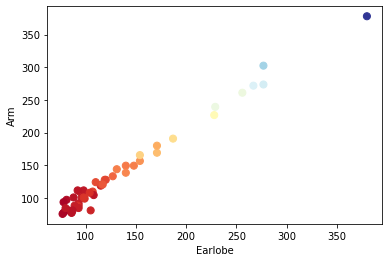

In [9]:
# PLotting the parameters
plt.xlabel("Earlobe")
plt.ylabel("Arm")
plt.scatter(df['Earlobe'],df['Arm'],s=50, c=df.Finger, cmap='RdYlBu')


We need to convert our data into arrays for easier matrix calculation 

In [10]:
x_data = data.drop(['Arm','Sex','Age','Finger'],axis=1)
x_data = np.array(x_data)
x_data = x_data.reshape(-1,1)

In [11]:
ones = np.ones([x_data.shape[0], 1])

In [12]:
X = np.concatenate([ones, x_data],1)

In [13]:
X.shape

(50, 2)

In [14]:
y_data = df.drop(['Age','Finger','Earlobe','Sex'],axis =1)
y_data = np.array(y_data)
Y = y_data.reshape(-1,1)

In [15]:
Y.shape

(50, 1)

Now let's get down to the main business.

## Method 2 - Using Ordinary Least Mean Square Method

In [22]:
# Method 2
x_mean = np.mean(x_data)
y_mean = np.mean(Y)

In [23]:
numerator = 0
denominator = 0

In [24]:
for i in range(len(X)):
    numerator += (x_data[i] - x_mean) * (Y[i] - y_mean)
    denominator += (x_data[i] - x_mean) ** 2

In [25]:
theta1 = numerator/denominator
theta0 = y_mean - (theta1 * x_mean)

In [26]:
# Plotting Values and Regression Line
max_x = np.max(X) + 10
min_x = np.min(X) - 10

In [27]:
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = theta0 + theta1 * x 

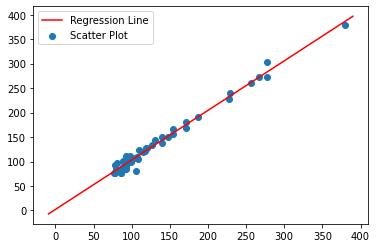

In [28]:
# Ploting Line
plt.plot(x, y, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(x_data, Y, label='Scatter Plot')
plt.legend()
plt.show()

We need to able to measure how good our model is (accuracy). There are many methods to achieve this but we would implement Root mean squared error and coefficient of Determination (R² Score).

In [29]:
#Root Mean Squared Error

rmse = 0
for i in range(len(x_data)):
    y_pred=  theta0 + theta1* x_data[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/len(x_data))
print(rmse)

[8.45230984]


In [30]:
# R² Score
sumofsquares = 0
sumofresiduals = 0
for i in range(len(x_data)) :
    y_pred = theta0 + theta1 * x_data[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

[0.98381999]


0.99 is pretty high and we can see from the graph too how well the line fits the data points

#### Conclusion of the comparison of the two methods - 
Gradient descent method will consume more the than the other one as we have iterate thousands of times to get the Global Minima.

### Here are some key terms we learned —

**Simple linear regression** — Finds the relationship between two variables that are linearly correlated. E.g. finding the relationship between the size of a house and the price of a house

**Linear relationship** — When you plot the dataset on a graph, the data lies approximately in the shape of a straight line.

**Linear equation** — y = mx +b. The standard form that represents a straight line on a graph, where m represents the gradient, and b represents the y-intercept.

**Gradient** — How steep the line is

**Y-intercept** — Where the line crosses the y-axis

**Cost function** — Calculates the total error of your line

**Minimizing the cost function** — Reducing the value of the cost function until the error is minimized.

**Learning rate (alpha (α))** — A small number that allows the parameters to be updated by a tiny amount.